## A/B Testing

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 


#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [6]:
len(df[df['converted'] == 1])/len(df) 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
len(df[ (df['group'] != 'treatment')  &  (df['landing_page'] == 'new_page')  ]) + len(df[ (df['group'] == 'treatment')  &  (df['landing_page'] != 'new_page')  ])
#OR
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 294478 entries, 0 to 294477

Data columns (total 5 columns):

 #   Column        Non-Null Count   Dtype 

---  ------        --------------   ----- 

 0   user_id       294478 non-null  int64 

 1   timestamp     294478 non-null  object

 2   group         294478 non-null  object

 3   landing_page  294478 non-null  object

 4   converted     294478 non-null  int64 

dtypes: int64(2), object(3)

memory usage: 11.2+ MB


ANS: NO

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Removing the inaccurate rows, and store the result in a new dataframe df2
nodf = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].user_id
nodf = nodf.index.tolist()
df2 = df.drop(nodf)
df2.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
print(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])

0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
len(df2['user_id'].unique())

290584

In [16]:
df2['index'] = df2.index
df2.head()

,user_id,timestamp,group,landing_page,converted,index
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,3
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,4


b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
re = df2['user_id'].duplicated()
re = pd.Series.to_frame(re)
re = re[re['user_id'] == True]
re = re.index[0]
re

2893

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['index'] == re]

,user_id,timestamp,group,landing_page,converted,index
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,2893


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2.shape[0]

290585

In [20]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

# Check again if the row with a duplicate user_id is deleted or not
df2 = df2.drop_duplicates('user_id')
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
len(df2[df2['converted'] == 1])/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
inter = len(df2[  (df2['converted'] == 1)   &   (df2['group'] == 'control' )])/len(df2)
prob_ctrl = len(df2[df2['group'] == 'control'])/len(df2)
b = inter/prob_ctrl
b

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
inter = len(df2[  (df2['converted'] == 1)   &   (df2['group'] == 'treatment' )])/len(df2)
prob_tr = len(df2[df2['group'] == 'treatment'])/len(df2)
c = inter/prob_tr
c

0.11880806551510564

In [29]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = b - c
obs_diff

0.0015782389853555429

d. What is the probability that an individual received the new page?

In [28]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**it depends on the acceptance error (alpha). However, from probilistic overview we can see that this new page does not leads to more conversion, 50% of the dataset receive the new page 11.9% only pay for a page, this indicates that the new page does not increase the revenue of the company.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Ho: Pnew <= pold vs Ha: pnew > pold**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [30]:
p_new = len(df2[ (df2['converted'] == 1)])/len(df2)

p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [31]:
p_old = len(df2[ (df2['converted'] == 1)])/len(df2)

p_old

0.11959708724499628

c. What is $n_{new}$?

In [32]:
len(df2[df2['landing_page'] == 'new_page'])

145310

d. What is $n_{old}$?

In [33]:
len(df2[df2['landing_page'] == 'old_page'])

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size = 145310)
p_new_s = len(new_page_converted[new_page_converted == 1])/145310
p_new_s

0.5008051751427982

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
# Simulate a Sample for the control Group
new_page_converted = np.random.choice([0,1], size = 145274)
p_old_s = len(new_page_converted[new_page_converted == 1])/145274
p_old_s

0.4992290430496854

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
p_new_s - p_old_s

0.0015761320931128031

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [37]:
# Sampling distribution 
p_diffs = []
sim_new = np.random.binomial(145310, p_new, 10000)/145310
sim_old = np.random.binomial(145274, p_old, 10000)/145274
p_diffs = sim_new - sim_old

In [38]:
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
obs_diff

-0.0015782389853555567

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

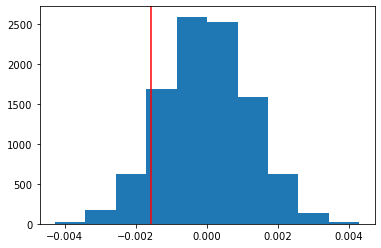

In [39]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(x = obs_diff
, c = 'red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.9013

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Value computed in part j called p value and it used to conclude the hypothesis tests, if 'p <= alpha' we have a signficent evidence to reject Ho, while if 'p > alpha' we will not reject Ho as in this example as p = 0.9058 and alpha = 0.05. So, thier is no need for a new page as the old page sale almost the same amount.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[ (df2['converted'] == 1)  &  (df2['landing_page'] == 'old_page')])

# number of conversions with the new_page
convert_new = len(df2[ (df2['converted'] == 1)  &  (df2['landing_page'] == 'new_page')])

# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page'] == 'old_page'])

# number of individuals who received new_page
n_new = len(df2[df2['landing_page'] == 'new_page'])
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
z_score, p_value = proportions_ztest(count, nobs, alternative = 'larger')
z_score, p_value
Z_score_95 = st.norm.ppf(.95)
alpha = 0.05
print(z_score, Z_score_95)
print(alpha, p_value)

-1.3109241984234394 1.6448536269514722

0.05 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We can conclude using two ways either by: 1) z_score < z_score_95. OR 2) p_value > alpha. Both Z-test and bootstrapping method conclude to the same result at the same level of signficent which is we can not reject Ho as conversion rate for old page will be larger or equal to conversion rate of new page so no need for this new page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression, because our response variable is binary categorical.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2['intercept'] = 1
df2[['ab_page', 'no_ab_page']] = pd.get_dummies(df['landing_page'])

df2 = df2.drop('no_ab_page',axis =1)
df2.head()

,user_id,timestamp,group,landing_page,converted,index,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,3,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,4,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
log_m = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
r = log_m.fit()

Optimization terminated successfully.

         Current function value: 0.366118

         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
r.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-08-16 17:21 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Ho: pnew - pold = 0 vs H1: pnew - pold != 0 (TWO-SIDED) The p value is also > alpha(=0.05), it's a different value from part II as the hypothesis test in the regression is two sided test whether in part II was one sided. And as p value > alpha then conversion is not signficantly dependent on the ab_page variable. So, the new page isn't nessecary at all as in partI and partII.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The problem her is that the new page doesn't affect the revenue or conversion rate as the conversion rate for old page is approximatly the same as new page. Adding any explonatory variables her is pointless as we can see next. As there is a problrm for multi-independent variables as they must be uncorrelated from each other and correlated with response so you must keep that on mind if you intend to increase independent variable this problem called multicollinearity by the way.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
# Join with the df2 dataframe
df_merged = pd.DataFrame()
df_merged = df2.merge(df3, on ='user_id')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,index,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,3,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,4,1,0,US


In [49]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged = df_merged.drop('CA', axis = 1)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,index,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,3,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,4,1,0,US,0,1


In [50]:
## g) 2
# Fit your model, and summarize the results.
df_merged['intercept'] = 1
log_m = sm.Logit(df_merged['converted'], df_merged[['intercept', 'UK', 'US']])
res = log_m.fit()
res.summary2()

Optimization terminated successfully.

         Current function value: 0.366116

         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-08-16 17:23 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**g) 2] At 0.05 level of signficant we can say that country variable does not affect conversion rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# Fit your model, and summarize the results
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_US'] = df_merged['ab_page'] * df_merged['US']
df_merged['intercept'] = 1
log_m = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US', 'ab_UK', 'ab_US']])
res = log_m.fit()
res.summary2()

Optimization terminated successfully.

         Current function value: 0.366109

         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-08-16 17:24 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""